<a href="https://colab.research.google.com/github/MiitaliGupta/MachineLearning/blob/main/KNN(with%20accuracy%20and%20error%20plots).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


### Reading the dataset

In [ ]:
dataset = pd.read_csv('/content/NASA_OrbitingBodies.csv')

x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

dataset

,Id,Name,Estimated Diameter,Relative Velocity,Hazardous
0,2162635,162635 (2000 SS164),2.679415,13569.249220,False
1,2277475,277475 (2005 WK4),0.594347,73588.726660,True
2,2512244,512244 (2015 YE18),1.614507,114258.692100,False
3,3596030,(2012 BV13),0.215794,24764.303140,False
4,3667127,(2014 GE35),0.570217,42737.733760,True
...,...,...,...,...,...
90831,3763337,(2016 VX1),0.059435,52078.886690,False
90832,3837603,(2019 AD3),0.037501,46114.605070,False
90833,54017201,(2020 JP3),0.071456,7566.807732,False
90834,54115824,(2021 CN5),0.016370,69199.154480,False


#Exploratory Data Analysis Methods

##Scatter Plot

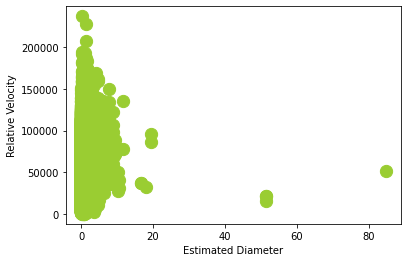

In [ ]:
dataset.plot.scatter(x='Estimated Diameter', y='Relative Velocity',s=150,c='yellowgreen')
plt.show()


We can see that smaller the astromonical body higher the velocity it has, witha few outliers.

##Bar Graph

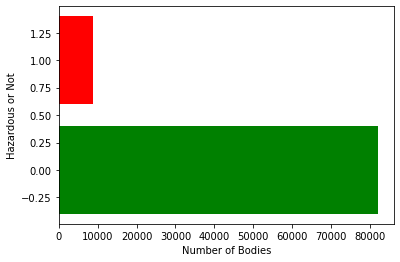

In [ ]:
Type = pd.DataFrame(dataset.Hazardous.value_counts())
x = Type.index
y = Type.Hazardous
plt.barh(x,y,color = ['g','r'])
plt.xlabel('Number of Bodies')  
plt.ylabel('Hazardous or Not')
plt.show()

We can see that maximum(more than 80000) of astromonical bodies orbiting around Earth are non-hazardous while only few(around 8000) bodies are hazardous

#K-Nearest Neighbour

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
print(x_train)

[[2.36613800e-03 2.79426101e+04]
 [6.51688380e-02 4.99203352e+04]
 [5.94346870e-02 2.77887620e+04]
 ...
 [5.17654480e-02 5.47838995e+04]
 [1.80318372e-01 4.95960633e+04]
 [1.36157002e-01 3.78558860e+04]]


In [ ]:
print(y_train)

[False False False ... False False False]


In [ ]:
print(x_test)

[[2.84472300e-02 6.26879764e+04]
 [4.11187571e-01 5.24438393e+04]
 [1.36157000e-02 2.52613776e+04]
 ...
 [3.11917671e-01 5.94679474e+04]
 [1.24176660e-02 3.79023638e+04]
 [4.30566240e-02 3.58693237e+04]]


In [ ]:
print(y_test)

[False  True False ... False False False]


###Applying KNN for different values and displaying accurracy

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

accuracy_rate = []
error_rate = []

# Will take some time
for i in range(5,200,22):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10)
    accuracy_rate.append(score.mean())
    error_rate.append(1-score.mean())
    print("K : ",i)
    print("Accuracy rate : ",score.mean())
    print()

K :  5
Accuracy rate :  0.8917390021657019

K :  27
Accuracy rate :  0.9026377211714482

K :  49
Accuracy rate :  0.9026817558488567

K :  71
Accuracy rate :  0.9026817558488567

K :  93
Accuracy rate :  0.9026817558488567

K :  115
Accuracy rate :  0.9026817558488567

K :  137
Accuracy rate :  0.9026817558488567

K :  159
Accuracy rate :  0.9026817558488567

K :  181
Accuracy rate :  0.9026817558488567



###Accuracy Visualisation

Text(0, 0.5, 'Accuracy Rate')

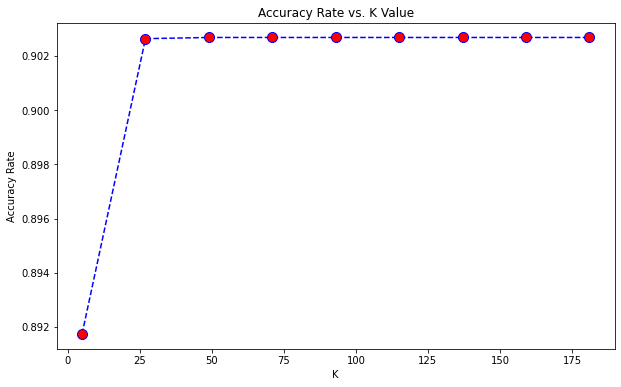

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(5,200,22),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

##Impact of Preprocessing

###Preprocessing

**Encoding character values**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])
x[:,1] = le.fit_transform(x[:,1])
y= le.fit_transform(y)

###Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)  

###KNN after Preprocessing

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

accuracy_rate = []
error_rate = []

# Will take some time
for i in range(5,200,22):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10)
    accuracy_rate.append(score.mean())
    error_rate.append(1-score.mean())
    print("K : ",i)
    print("Accuracy rate : ",score.mean())
    print()

K :  5
Accuracy rate :  0.8837357562065347

K :  27
Accuracy rate :  0.9005570793309685

K :  49
Accuracy rate :  0.9023955358995879

K :  71
Accuracy rate :  0.9026817570608314

K :  93
Accuracy rate :  0.9026377211714482

K :  115
Accuracy rate :  0.9026817558488567

K :  137
Accuracy rate :  0.9026817558488567

K :  159
Accuracy rate :  0.9026817558488567

K :  181
Accuracy rate :  0.9026817558488567



###Accuracy Visualisation after Preprocessing

Text(0, 0.5, 'Accuracy Rate')

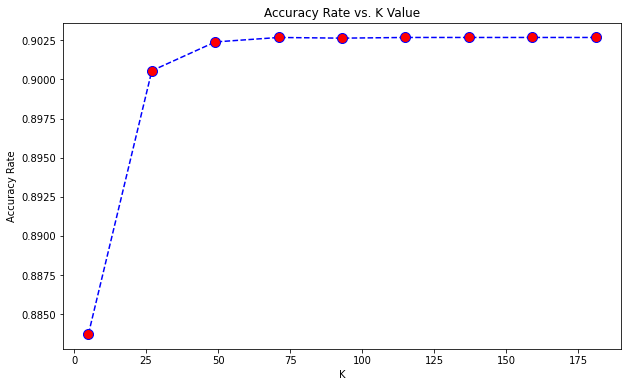

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(5,200,22),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

##Training and Testing Error

###Training Error

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

error_rate = []

# Will take some time
for i in range(5,200,22):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train) 
    score=cross_val_score(knn,x_train,y_train,cv=10)
    error_rate.append(1-score.mean())
    print("K : ",i)
    print("Error rate : ",1-score.mean())
    print()

K :  5
Error rate :  0.11284113027281717

K :  27
Error rate :  0.09988204950705326

K :  49
Error rate :  0.09824645350856476

K :  71
Error rate :  0.09750729411804271

K :  93
Error rate :  0.09735000948046135

K :  115
Error rate :  0.09738146838668071

K :  137
Error rate :  0.09727137334511782

K :  159
Error rate :  0.09722419364261481

K :  181
Error rate :  0.09725564265531861



In [ ]:
#Predicting the train set result  
y_pred= knn.predict(x_train)  

###Training Error Visualisation

Text(0, 0.5, 'Error Rate')

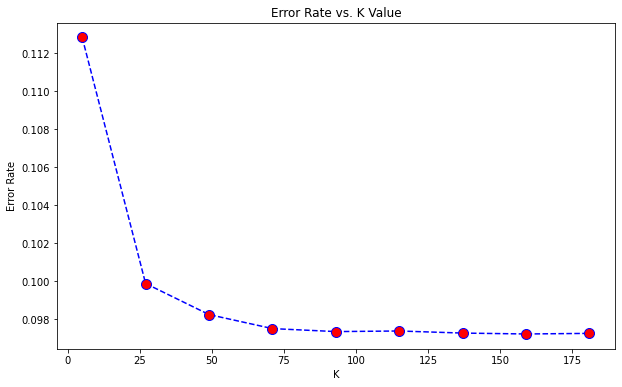

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(5,200,22),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

###Testing Error

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

error_rate = []

# Will take some time
for i in range(5,200,22):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_test, y_test) 
    score=cross_val_score(knn,x_test,y_test,cv=10)
    error_rate.append(1-score.mean())
    print("K : ",i)
    print("Error rate : ",1-score.mean())
    print()

K :  5
Error rate :  0.11331687386835565

K :  27
Error rate :  0.10058348085375624

K :  49
Error rate :  0.09874863193037486

K :  71
Error rate :  0.09805141114783233

K :  93
Error rate :  0.09783126804741293

K :  115
Error rate :  0.09764779527082068

K :  137
Error rate :  0.09750100627999492

K :  159
Error rate :  0.09750100627999492

K :  181
Error rate :  0.09750100627999492



In [ ]:
#Predicting the test set result  
y_pred= knn.predict(x_test)  

###Testing Error Visualisation

Text(0, 0.5, 'Error Rate')

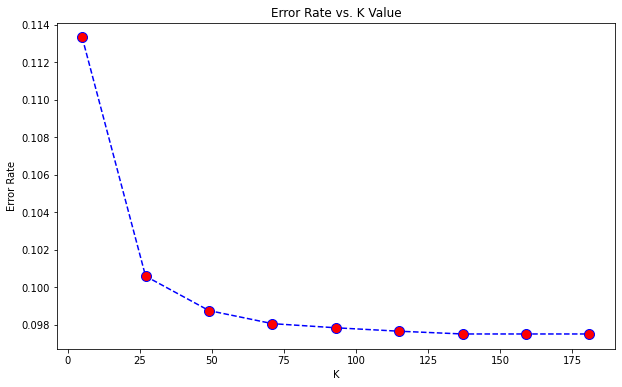

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(5,200,22),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

##Visualising KNN

In [ ]:
# import matplotlib.pyplot as mtp 
# from matplotlib.colors import ListedColormap 

# x_set, y_set = x_test, y_test  
# x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
# np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
# mtp.contourf(x1, x2, knn.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
# alpha = 0.75, cmap = ListedColormap(('red','green' )))  
# mtp.xlim(x1.min(), x1.max())  
# mtp.ylim(x2.min(), x2.max())  
# for i, j in enumerate(np.unique(y_set)):  
#     mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
#         c = ListedColormap(('red', 'green'))(i), label = j)  
# mtp.title('K-NN Algorithm (Training set)')  
# mtp.xlabel('Age')  
# mtp.ylabel('Estimated Salary')  
# mtp.legend()  
# mtp.show()  

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[24594     0]
 [ 2657     0]]


0.9024989908627207

##Conclusion

###DataSet

To demonstrate KNN Classifier I have used a dataset from NASA which lists out few Earth orbiting bodies with their name,esitimated diameters and velocities. The size of the data set is 90836x5. Based on diameter and velocities of bodies, we predict if they is Hazardous to Earth or Not.

###Accuracy Rate and Error Rate

From the graph is it clear that the both accuracy and error rate of the prediction stabilizes after a certain value of K

###Effect of Preprocessing

From the graph we can easily see how after preprocessing the accuracy of the graph increases and shows us few values prediction accuracies which were not earlier visible


###Inference

After Spliting, Scaling and Training we can see that the accuracy in results is 90.25% and Confusion matrix is [[24594     0] [ 2657     0]] which shows that 0+2657=2657 values out of 90836 were wrongly predicted.